In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
pure_cores_counts = pd.read_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/bioclavis/00_data/pure_cores_densities_with_annotations.csv', index_col=0)
pure_cores_counts

,core,CKPAN_mm2,SMA_mm2,Negative_mm2,CD4_mm2,CD68_mm2,CD8_mm2,cluster
0,01-02-B,2045.174368,910.768869,2104.270058,1354.565913,375.431442,1023.166553,HPC 64
1,01-02-E,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,HPC 24
2,01-02-K,667.502252,1491.531195,1972.753748,226.381578,166.875563,1648.057885,HPC 8
3,01-04-A,2526.258428,1465.999908,1634.812019,709.307026,616.016123,279.872710,HPC 21
4,01-04-K,247.225634,1504.367983,1452.450599,231.155968,173.057944,1351.088089,HPC 6
...,...,...,...,...,...,...,...,...
722,20-15-E,2015.291674,835.049075,3679.403809,2897.231199,596.606149,519.785625,HPC 48
723,21-14-H,1101.234620,1157.128817,1455.627618,1058.422043,331.797472,480.452253,HPC 64
724,22-02-C,943.884921,2978.741062,1406.573608,1021.811437,702.312723,393.528904,HPC 27
725,22-02-F,2680.154544,434.594504,2093.870738,1536.435817,799.393317,544.406392,HPC 11


In [3]:
pure_cores_counts['cluster'].value_counts()

HPC 52    73
HPC 11    48
HPC 46    42
HPC 64    38
HPC 48    37
HPC 44    36
HPC 67    33
HPC 50    30
HPC 0     28
HPC 68    25
HPC 41    23
HPC 35    22
HPC 17    22
HPC 28    20
HPC 30    20
HPC 13    19
HPC 27    18
HPC 21    15
HPC 34    15
HPC 31    14
HPC 69    14
HPC 47    13
HPC 54    13
HPC 40     9
HPC 56     8
HPC 61     8
HPC 33     8
HPC 5      6
HPC 16     6
HPC 58     5
HPC 15     4
HPC 32     4
HPC 2      3
HPC 12     3
HPC 1      3
HPC 70     3
HPC 22     3
HPC 6      3
HPC 43     3
HPC 37     3
HPC 60     3
HPC 45     2
HPC 53     2
HPC 8      2
HPC 38     2
HPC 10     2
HPC 24     2
HPC 66     2
HPC 55     2
HPC 62     2
HPC 57     2
HPC 59     1
HPC 65     1
HPC 25     1
HPC 51     1
Name: cluster, dtype: int64

In [4]:
cluster_annotations = pd.read_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/consensus_frame_JLQ_DD_KR.csv', index_col=0)
cluster_annotations

,cluster,malignant,feature,inflammation,necrosis,stroma_epi_ratio,stroma_cellularity,purity,description,free text
0,0,1,acinar,2.0,1.0,2.0,2.0,3.0,NaN,NaN
1,1,0,collagenosis,1.0,1.0,NaN,NaN,3.0,NaN,NaN
2,2,0,other,2.0,1.0,NaN,NaN,3.0,NaN,Anthracosis
3,3,0,collagenosis,1.0,1.0,NaN,NaN,3.0,NaN,NaN
4,4,0,cartilage,1.0,1.0,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
66,66,0,normal/near-normal lung,1.0,1.0,NaN,NaN,3.0,NaN,NaN
67,67,1,acinar,3.0,1.0,2.0,2.0,3.0,NaN,NaN
68,68,1,acinar,2.0,1.0,2.0,2.0,3.0,NaN,NaN
69,69,1,acinar,2.0,1.0,3.0,2.0,3.0,NaN,NaN


In [5]:
stromal = cluster_annotations[cluster_annotations['cluster'].isin([60, 56, 59, 16, 15, 25, 18, 26, 10, 43, 23, 2, 55, 1, 32, 14, 42, 3])]
stromal_cluster = stromal['cluster'].values
malignant_cluster = cluster_annotations[cluster_annotations['malignant'] == 1]['cluster'].values

In [7]:
sc_annot = pd.read_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/bioclavis/data/merged_cluster_lym_log10_density_and_noise.csv', index_col=0)
sc_annot

,Supercluster,HPC,noise,robust_z_score_x,median_x,CKPAN,SMA,Negative,CD4,CD68,CD8,lym,robust_z_score_y,median_y
0,Hot cohesive,HPC 0,0.030344,-0.398536,0,3.458759,3.042304,1208.949339,3.092664,2.676937,2.587051,3.247579,0.269873,1
1,Cold cohesive,HPC 11,0.025816,-0.489230,0,3.537818,2.678664,1141.304331,2.837660,2.645275,2.453921,3.020685,-0.416745,0
2,Hot discohesive,HPC 13,0.088962,0.775638,1,3.376048,2.875556,1080.732825,3.052229,2.809495,2.732999,3.250600,0.279017,1
3,Hot discohesive,HPC 16,0.215348,3.307301,1,3.119559,3.016854,2125.246560,3.271159,2.916385,3.294004,3.602642,1.344358,1
4,Cold cohesive,HPC 17,0.008196,-0.842181,0,3.686496,2.845440,1037.222203,2.978421,2.584696,2.314590,3.053223,-0.318280,0
5,Cold cohesive,HPC 21,0.024876,-0.508074,0,3.503920,2.830604,1566.409993,2.785833,2.625204,2.252343,2.961775,-0.595019,0
6,Cold discohesive,HPC 27,0.154209,2.082626,1,3.120690,3.012635,1607.224329,2.625153,2.678300,2.490447,2.968499,-0.574672,0
7,Hot discohesive,HPC 28,0.085580,0.707910,1,3.224591,2.836164,2142.051194,3.403758,2.911226,3.056120,3.558568,1.210980,1
8,Cold discohesive,HPC 30,0.080967,0.615499,1,3.378119,2.727039,957.674492,2.685309,2.737602,2.307740,2.887261,-0.820510,0
9,Cold discohesive,HPC 31,0.068879,0.373365,1,3.329674,2.872341,1604.931778,2.801328,2.681267,2.618584,3.127121,-0.094653,0


In [8]:
inv_pure_frame = pure_cores_counts[pure_cores_counts['cluster'].isin(sc_annot['HPC'])]
inv_pure_frame

,core,CKPAN_mm2,SMA_mm2,Negative_mm2,CD4_mm2,CD68_mm2,CD8_mm2,cluster
0,01-02-B,2045.174368,910.768869,2104.270058,1354.565913,375.431442,1023.166553,HPC 64
3,01-04-A,2526.258428,1465.999908,1634.812019,709.307026,616.016123,279.872710,HPC 21
10,01-07-G,2771.386517,327.162067,1202.571829,1027.266558,341.677790,519.216249,HPC 48
16,01-11-K,2137.711193,638.879531,1673.255915,2654.899385,675.386933,1116.518038,HPC 44
17,01-12-A,3518.699032,419.103373,1493.954240,399.198727,927.777652,265.395276,HPC 21
...,...,...,...,...,...,...,...,...
722,20-15-E,2015.291674,835.049075,3679.403809,2897.231199,596.606149,519.785625,HPC 48
723,21-14-H,1101.234620,1157.128817,1455.627618,1058.422043,331.797472,480.452253,HPC 64
724,22-02-C,943.884921,2978.741062,1406.573608,1021.811437,702.312723,393.528904,HPC 27
725,22-02-F,2680.154544,434.594504,2093.870738,1536.435817,799.393317,544.406392,HPC 11


In [12]:
inv_pure_frame = inv_pure_frame.merge(sc_annot[['HPC', 'Supercluster']], left_on='cluster', right_on='HPC')
inv_pure_frame

,core,CKPAN_mm2,SMA_mm2,Negative_mm2,CD4_mm2,CD68_mm2,CD8_mm2,cluster,HPC,Supercluster
0,01-02-B,2045.174368,910.768869,2104.270058,1354.565913,375.431442,1023.166553,HPC 64,HPC 64,Cold discohesive
1,02-16-I,3966.870589,781.548062,1032.209035,321.360223,317.503900,102.835271,HPC 64,HPC 64,Cold discohesive
2,04-02-C,1449.925764,949.951362,1501.923102,767.960680,835.957199,207.989351,HPC 64,HPC 64,Cold discohesive
3,04-02-G,2573.588025,892.028342,1390.305834,526.692502,579.463234,362.291374,HPC 64,HPC 64,Cold discohesive
4,04-02-K,2230.767397,1001.910533,1376.319688,767.643352,496.771924,306.429839,HPC 64,HPC 64,Cold discohesive
...,...,...,...,...,...,...,...,...,...,...
477,14-02-F,1305.779795,1111.924531,1866.314118,588.881084,904.353093,769.020173,HPC 5,HPC 5,Cold discohesive
478,05-06-A,1127.346805,423.406848,2588.413294,1043.916885,917.729129,929.200743,HPC 5,HPC 5,Cold discohesive
479,12-06-G,279.134734,1401.201090,1685.863244,862.277594,343.621306,461.539610,HPC 5,HPC 5,Cold discohesive
480,14-06-D,604.553371,384.966356,957.362633,114.846765,198.455210,208.561725,HPC 5,HPC 5,Cold discohesive


In [29]:
dec_order = list(inv_pure_frame['HPC'].value_counts().to_frame().sort_values(by='HPC', ascending=False).index)

In [31]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

/tmp/ipykernel_1800312/2493830448.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


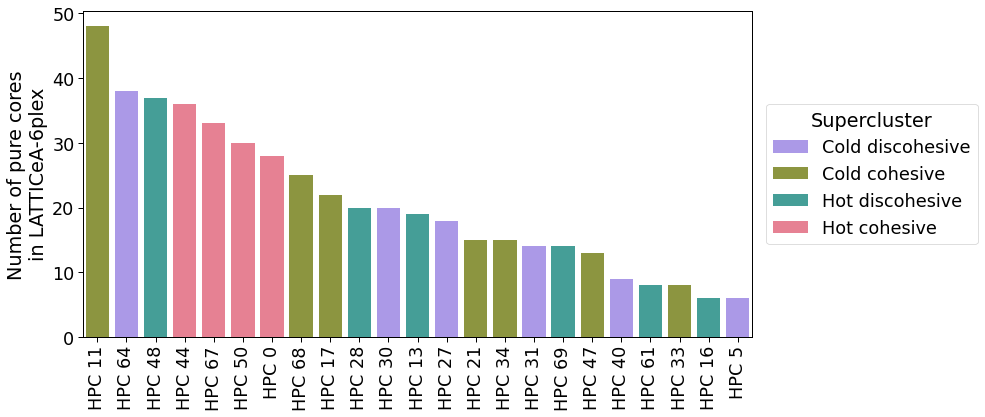

In [32]:
sns.set_context("paper", font_scale=2.0)
fig, ax = plt.subplots(figsize=(12,6))

sns.countplot(inv_pure_frame, x='cluster', hue='Supercluster', palette={'Hot cohesive':(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
                                                                        'Hot discohesive':(0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
                                                                        'Cold cohesive':(0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
                                                                        'Cold discohesive':(0.6423044349219739, 0.5497680051256467, 0.9582651433656727)}, order=dec_order, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel('Number of pure cores\nin LATTICeA-6plex')
ax.set_xlabel(None)
sns.move_legend(ax, loc='right', bbox_to_anchor=(1.35, 0.5))
plt.savefig(fname='/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/bioclavis/pure_cores_barplot.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)